In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib_inline

In [2]:
Nutrients = pd.read_csv(r"C:\Users\HITESH KOTIAN\OneDrive\Desktop\Project\Food_csv\nutrients_csvfile.csv")
Nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [3]:
# To remove t and put 0
Nutrients = Nutrients.replace("t",0)
Nutrients = Nutrients.replace("t'",0)
Nutrients['Fiber'] = Nutrients["Fiber"].replace("a",0)

In [4]:
Nutrients.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat.Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

In [5]:
Nutrients = Nutrients.replace(",", "", regex= True)
Nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products


In [6]:
# 'Calories' [91] have value 8-44 for this take a mean
Nutrients['Calories'][91] = (8+44)/2 

In [7]:
Nutrients['Grams'] = pd.to_numeric(Nutrients['Grams'])
Nutrients['Calories'] = pd.to_numeric(Nutrients['Calories'])
Nutrients['Protein']   = pd.to_numeric(Nutrients['Protein'])
Nutrients['Fat']   = pd.to_numeric(Nutrients['Fat'])
Nutrients['Sat.Fat']   = pd.to_numeric(Nutrients['Sat.Fat'])
Nutrients['Fiber']   = pd.to_numeric(Nutrients['Fiber'])
Nutrients['Carbs']   = pd.to_numeric(Nutrients['Carbs'])
Nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

<Axes: >

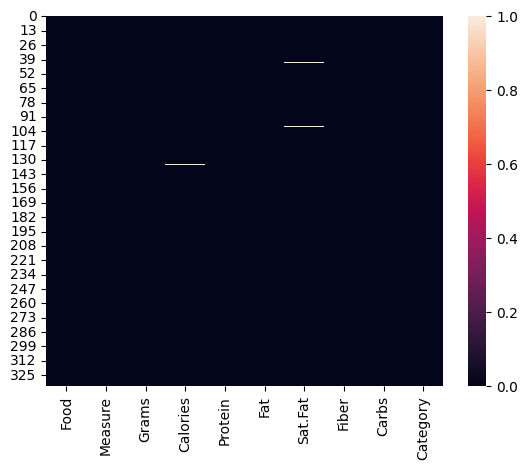

In [8]:
# To check null
sn.heatmap(Nutrients.isnull())

In [9]:
Nutrients = Nutrients.dropna()

In [10]:
Nutrients.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,143.527108,188.521084,8.590361,8.451807,6.457831,2.384970,25.169578
std,139.194736,184.073272,17.809184,19.711379,18.542220,16.126211,35.936783
min,11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,108.000000,131.000000,3.000000,1.000000,0.000000,0.200000,14.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


### Food vs Macronutrients

In [11]:
Nutrients['Category'].value_counts()

Category
Breads cereals fastfoodgrains    45
Meat Poultry                     29
Desserts sweets                  29
Dairy products                   28
Fruits G-P                       28
Vegetables A-E                   27
Vegetables R-Z                   27
Fruits A-F                       22
Fish Seafood                     19
Fats Oils Shortenings            14
Vegetables F-P                   14
Seeds and Nuts                   12
DrinksAlcohol Beverages          12
Soups                            10
Fruits R-Z                        8
Jams Jellies                      8
Name: count, dtype: int64

In [12]:
new_data = Nutrients[["Protein",'Category']]
new_data
grouped_data = new_data.groupby('Category').sum().reset_index()
grouped_data

,Category,Protein
0,Breads cereals fastfoodgrains,403
1,Dairy products,503
2,Desserts sweets,78
3,DrinksAlcohol Beverages,0
4,Fats Oils Shortenings,234
5,Fish Seafood,606
6,Fruits A-F,29
7,Fruits G-P,28
8,Fruits R-Z,7
9,Jams Jellies,0


In [13]:
# List of all the categories
Types = ["Breads cereals fastfoodgrains", "Meat Poultry","Desserts sweets", "Dairy products", "Fruits G-P", "Vegetables A-E",
         "Vegetables R-Z","Vegetables F-P" "Fruits A-F", "Fish Seafood", "Seeds and Nuts", "DrinksAlcohol Beverages","Soups"
         "Fruits R-Z","Jams Jellies"]


Protein_types = Nutrients[Nutrients['Category'].isin(Types)]
Protein_sort = Protein_types.sort_values(by='Protein', ascending= False)
Protein_25 = Protein_sort.head(25)
graph = px.bar(Protein_25, x = 'Food', y = 'Calories',color='Protein', title=' Top 25 protein rich foods')
graph.show()

Oyster have the most protein content with low calories. FOrtified follows the 2nd most protien content but with high calories. 

In [14]:
Calories_types = Nutrients[Nutrients['Category'].isin(Types)]
Calories_sort = Calories_types.sort_values(by='Calories', ascending= False)
Calories_25 = Calories_sort.head(25)
graph = px.bar(Calories_25, x = 'Food', y = 'Calories',color='Calories', title=' Top 25 Calories rich foods')
graph.show()

Fortified milk has the highest content of calories as we saw in protein graph, followed by white 20 slices. Powdered milk, nuts and almonds contain almost the same calories.

In [15]:
Fat_types = Nutrients[Nutrients['Category'].isin(Types)]
Fat_sort = Fat_types.sort_values(by='Fat', ascending= False)
Fat_25 = Fat_sort.head(25)
graph = px.bar(Fat_25, x = 'Food', y = 'Calories',color='Fat', title=' Top 25 Fat rich foods')
graph.show()

Oysets have the highest fat content but with low calories.

### Analyse the protein content in  (Meat and seafood) vs (Vegeatables, Fruits and Dairy products) 

In [16]:
meat = Nutrients[Nutrients['Category'].isin(["Meat Poultry", "Fish Seafood","Vegetables A-E",
         "Vegetables R-Z","Vegetables F-P","Fruits A-F", "Dairy produc"])]
# meat_sort = meat.sort_values(by='Protein', ascending=False)
# meat_20 = meat_sort.head(20)

meat_category_sum = meat.groupby(['Category']).sum()
max_value_index = meat_category_sum['Protein'].idxmax()

explode = [0.1 if i == max_value_index else 0 for i in range(len(meat_category_sum))]
graph = go.Figure(go.Pie(values = meat_category_sum['Protein'].values, labels= meat_category_sum.index))
graph.update_traces(hoverinfo='label+percent', hole=0.25, textfont_size=20,marker =dict(line=dict(color='#000000', width=0.5)))
graph.show()

Meat and Seafood contain 80% of protein as compared to total protein content from all vegetables, dairy product, fruits and Non vegetables.

Category wise distribution

In [17]:
categories_sort = Nutrients.groupby(['Category']).sum()

graph = make_subplots(rows=2, cols= 3,specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

graph.add_trace(go.Funnelarea(
    values=categories_sort['Protein'].values,labels=categories_sort.index,title= 'Protein',marker=dict(colors=['#f03405'], line=dict(color='#FFFFFF', width=2.5))
), row=1, col=1 )
graph.add_trace(go.Funnelarea(
    values=categories_sort['Calories'].values,labels=categories_sort.index, title = 'Calories',marker=dict(line=dict(color='#FFFFFF', width=2.5))
), row=1, col=2 )
graph.add_trace(go.Funnelarea(
    values=categories_sort['Fat'].values,labels=categories_sort.index, title = 'Fat',marker=dict(line=dict(color='#FFFFFF', width=2.5))
), row=1, col=3 )
graph.add_trace(go.Funnelarea(
    values=categories_sort['Fiber'].values,labels=categories_sort.index,title = 'Fiber',marker=dict(line=dict(color='#FFFFFF', width=2.5))
), row=2, col=1 )
graph.add_trace(go.Funnelarea(
    values=categories_sort['Carbs'].values,labels=categories_sort.index,title='Carbs',marker=dict(line=dict(color='#FFFFFF', width=2.5))
), row=2, col=2 )
graph.add_trace(go.Funnelarea(
    values=categories_sort['Sat.Fat'].values,labels=categories_sort.index,title = 'Sat.Fat',marker=dict(line=dict(color='#FFFFFF', width=2.5))
), row=2, col=3 )
graph.update_layout(title_text="Nutritional Content by Category",height=750, width=1100)
graph.show()

Protein is rich in Seafood and Meat, whereas Bread cereal foodgrains gives the most calories followed by dairy products.Fat oil is the biggest supplement of Fats and soups being the least. Interesting thing to see is Fat oil and seafood gives the equal amount of Fiber, For Carbs we need to go for Bread ceral foodgrains followed by Fruits and Fats Oil for Sat.Fat

### Carbs are seen to be rich in bread cereal foodgrains and dessert, analyse the foods of them for carbs

In [18]:
cereal_dessert = Nutrients[Nutrients['Category'].isin(['Bread cereals fastfoodgrain', 'Desserts sweets'])]
cereal_dessert_sort = cereal_dessert.sort_values(by ='Fat', ascending= False)
cereal_dessert_15 = cereal_dessert_sort.head(15)

graph = go.Figure(go.Scatter(x = cereal_dessert_15['Food'], y = cereal_dessert_15['Fat'],
    marker=dict(
        color=np.random.randn(15), colorscale='sunset', line_width=1,size = 20 )))
graph.update_layout(title = 'High content carbs Foods')
graph.show()

Chocolate fudge is amongst all has the highest level of carbs present followed by cherry Pie, Ginger bread also makes the top 15 in the carbs levelin

### 3D Graph for Category, Food and Fibers

In [19]:
graph = go.Figure(go.Scatter3d(
    x = Nutrients['Category'].values, y= Nutrients['Food'].values, z= Nutrients['Fiber'].values,
    mode = 'markers',
    marker= dict(
        color = Nutrients['Fiber'].values, 
        colorscale = 'hsv',
        colorbar = dict(title = 'Fibers (Daily value)' , )
    )) )
graph.update_layout(height=800, width=800, title='3D Scatter Plot for Fiber ')
graph.show()

### Boxenplot is to show Total calories in Every category

Text(0, 0.5, 'Total Calories (% Daily Value)')

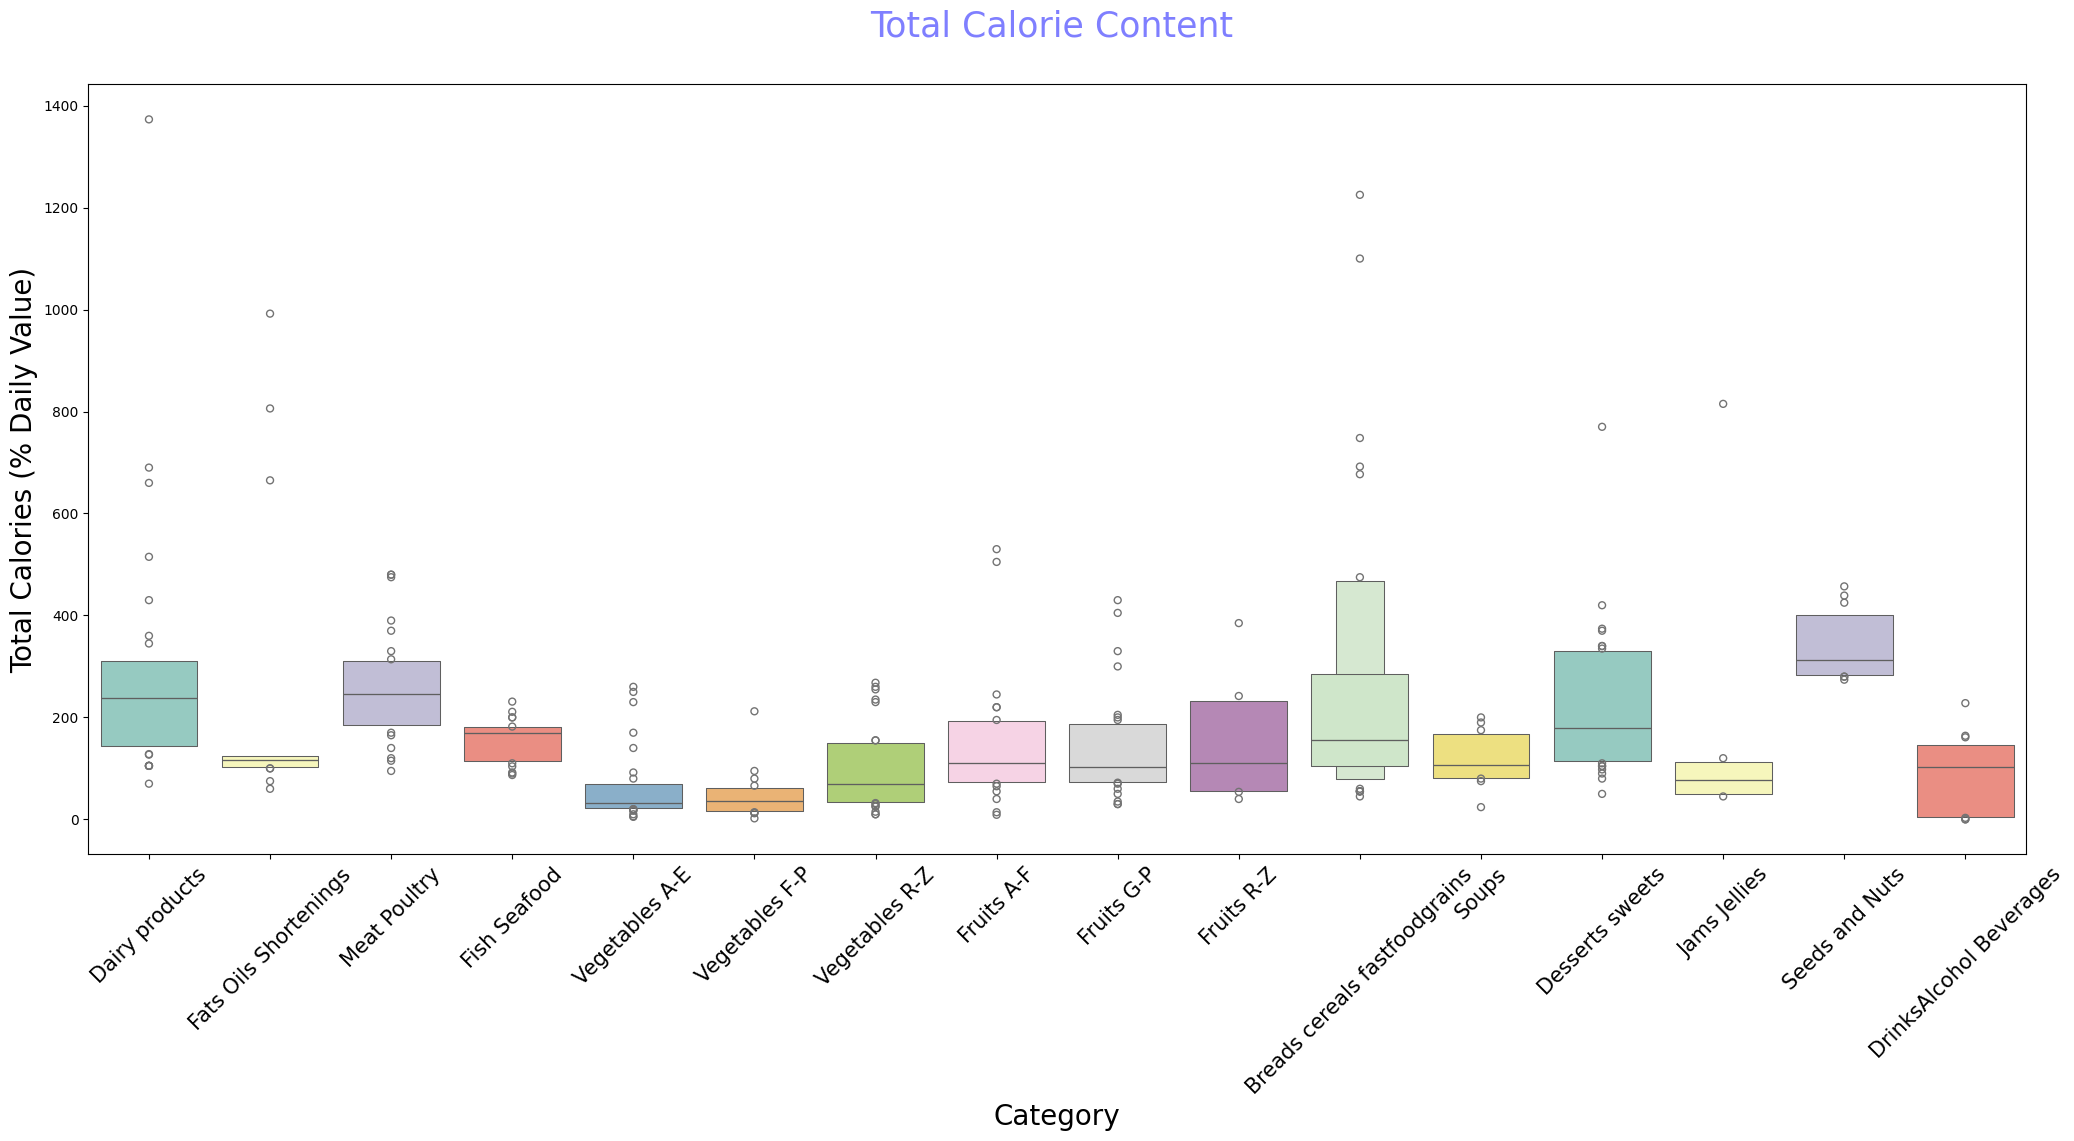

In [20]:
plt.figure(figsize=(25,10))

graph = sn.boxenplot(Nutrients, x= 'Category', y ='Calories', color= '#7aba47', palette= "Set3" , hue= 'Category')

plt.title("Total Calorie Content \n", size = 25, alpha = 0.5, color = 'b')
plt.xticks(size = 15, rotation = 45)
plt.xlabel('Category',fontsize=20) 
plt.ylabel('Total Calories (% Daily Value)',fontsize=20)


### Boxplot is to show Total Protein Content in Every Category

(-10.0, 100.0)

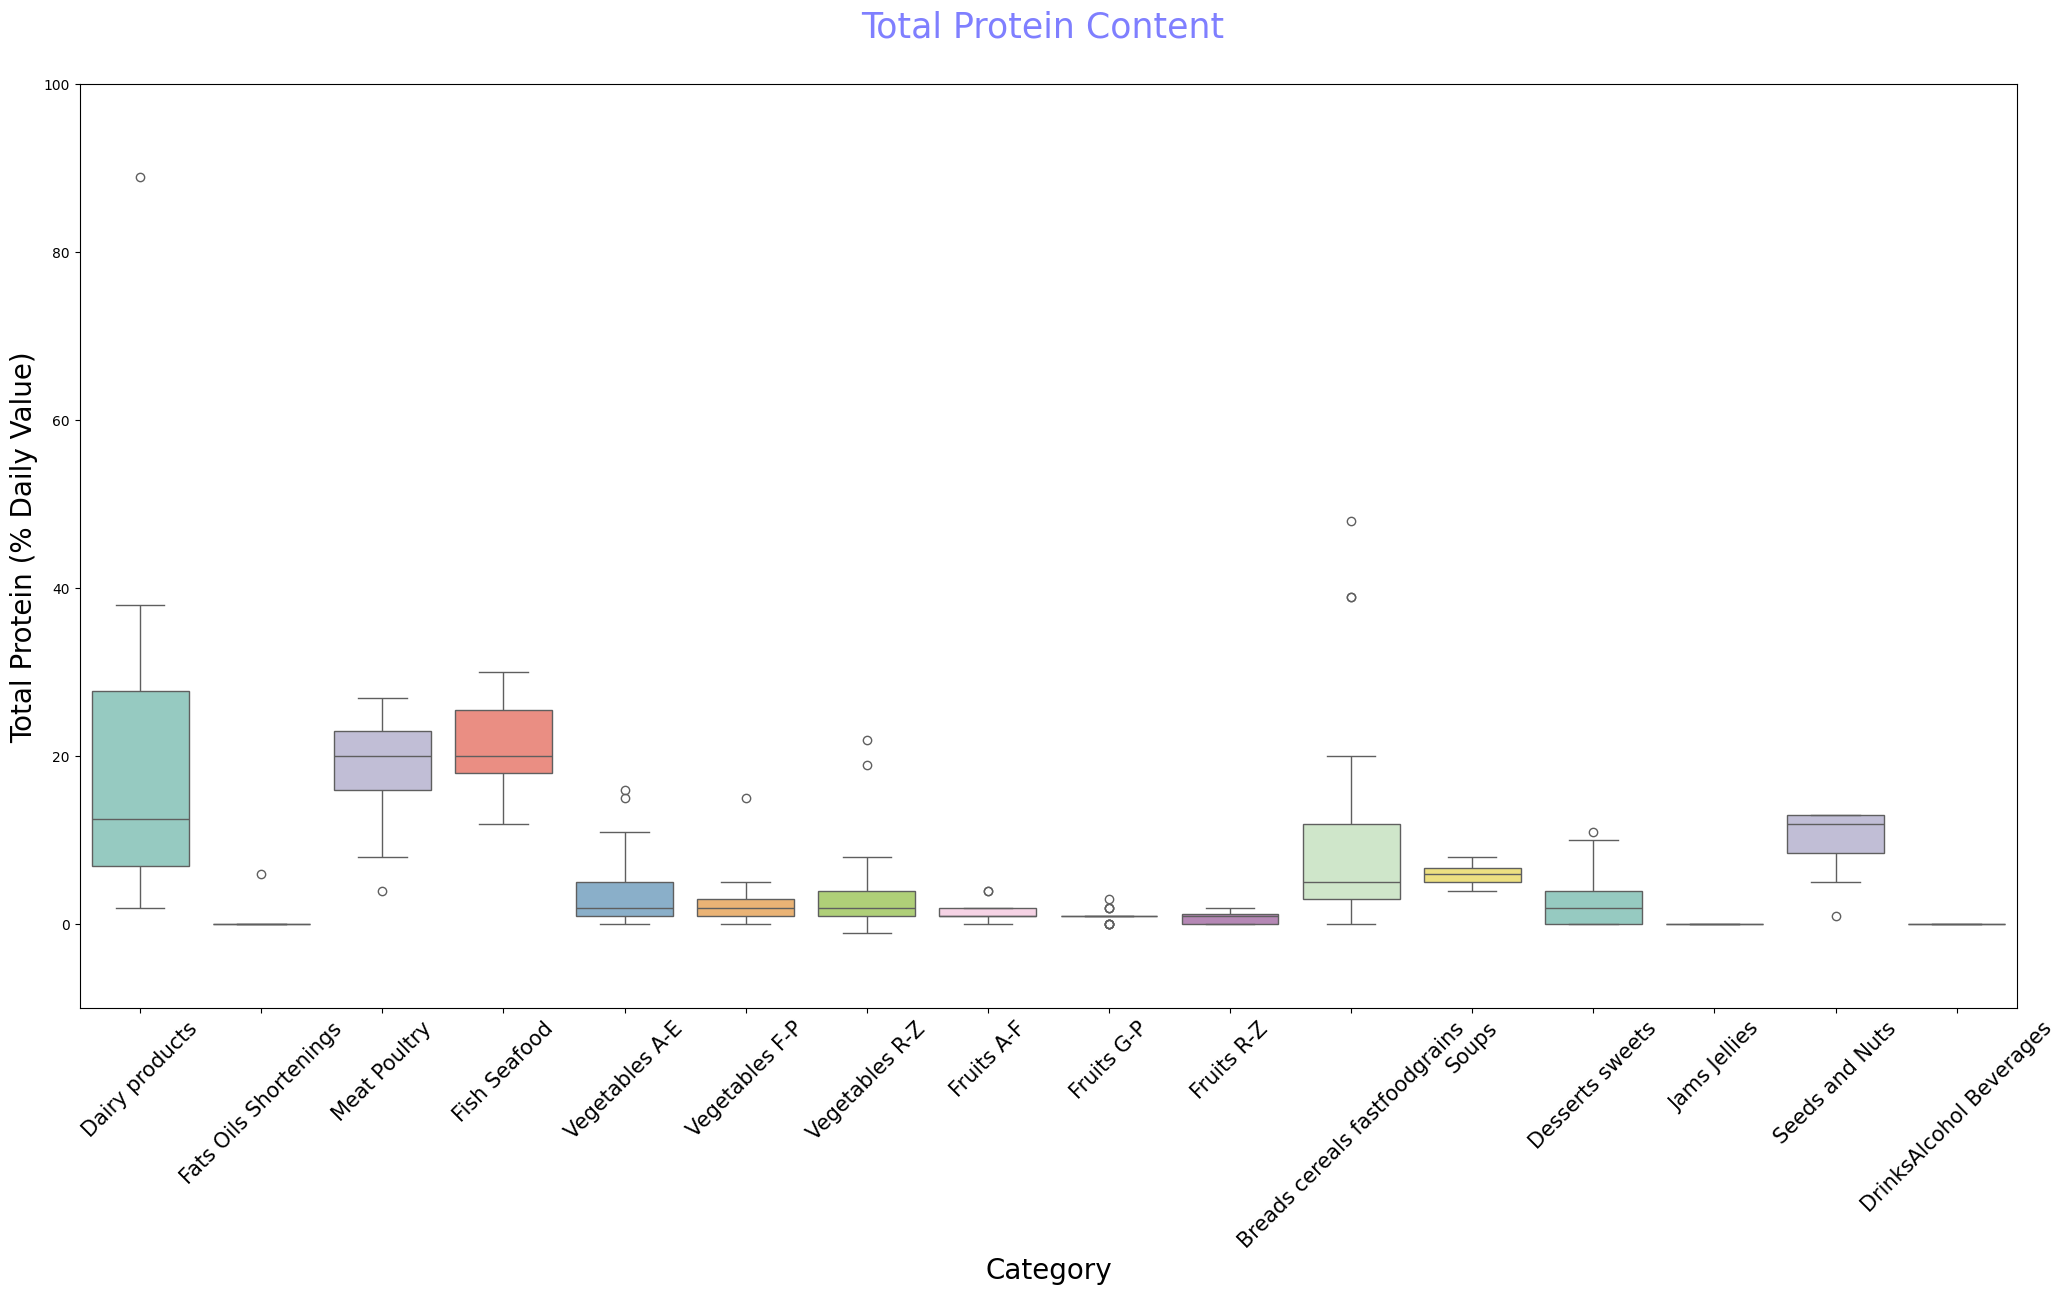

In [21]:
plt.figure(figsize=(25,12))

graph = sn.boxplot(Nutrients, x= 'Category', y ='Protein', color= '#7aba47', palette= "Set3" , hue= 'Category')

plt.title("Total Protein Content \n", size = 25, alpha = 0.5, color = 'b')
plt.xticks(size = 15, rotation = 45)
plt.xlabel('Category',fontsize=20) 
plt.ylabel('Total Protein (% Daily Value)',fontsize=20)
plt.ylim(-10,100)